In [1]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#11ccee','#cc11ee','Ewert','Aladin',24,30
def dhtml(string,font_color=c1,font_family=f1,font_size=fs1):
    display(HTML("""
    <style>@import 'https://fonts.googleapis.com/css?family="""+\
    font_family+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font_family+\
    """; color:"""+font_color+\
    """; font-size:"""+str(font_size)+"""px;'>%s</h1>"""%string))

In [2]:
dhtml('Code Modules, Setting, & Functions')

In [3]:
import os,cv2,h5py,numpy as np,pandas as pd
import urllib,pylab as pl,seaborn as sn
import torch,tensorflow_hub as th,tensorflow as tf
import tensorflow.keras.preprocessing.image as tkimg
from tqdm import tqdm; from PIL import Image
from torch.utils.data import DataLoader as tdl
from torch.utils.data import Dataset as tds
from IPython.core.magic import register_line_magic

In [4]:
batch_size,batch_size2=16,8
img_size,img_size2=160,64
crop_size=(img_size2,img_size2)
dev=torch.device('cuda:0' \
if torch.cuda.is_available() else 'cpu')
file_path='../input/white-flowers/white_flowers/'
file_path2='https://olgabelitskaya.gitlab.io/images/'
hub_path='https://tfhub.dev/google/magenta/'+\
         'arbitrary-image-stylization-v1-256/1'
objects=['jasmine','phlox','leucanthemum maximum','cherry',
         'viola','lily of the valley','apple tree',
         'snowdrop','perennial aster','blackberry',
         'strawberry','Nanking cherry','bellflower']
classes=['jasmine','phlox','cherry','viola',
         'lily of the valley','snowdrop']

In [5]:
def get_file(file_path,file_name):
    input_file=urllib.request.urlopen(file_path+file_name)
    output_file=open(file_name,'wb')
    output_file.write(input_file.read())
    output_file.close(); input_file.close()
def paths2tensor(img_paths,file_path,img_size=160):
    tensor=[]
    for img_path in tqdm(img_paths):
        img0=tkimg.load_img(
            file_path+img_path,
            target_size=(img_size,img_size))
        img=tkimg.img_to_array(img0)
        tensor.append(np.expand_dims(img,axis=0))
    return np.vstack(tensor)/255
def load_img(path_to_img,max_dim=512):
    img=tf.io.read_file(path_to_img)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.convert_image_dtype(img,tf.float32)
    shape=tf.cast(tf.shape(img)[:-1],tf.float32)
    scale=max_dim/max(shape)
    new_shape=tf.cast(shape*scale,tf.int32)
    img=tf.image.resize(img,new_shape)
    return img[tf.newaxis,:]
def tensor2img(tensor):
    tensor=tensor*255
    tensor=np.array(tensor,dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0]==1
        tensor=tensor[0]
    return Image.fromarray(tensor)
def plcmap(cmap,n):
    return [pl.cm.get_cmap(cmap)(i/n)[:3] 
            for i in range(1,n+1)]
@register_line_magic
def display_examples(data):
    for images,labels in dataloaders[data]:  
        print('image dimensions: %s'%str(images.shape))
        print('label dimensions: %s'%str(labels.shape))
        n=np.random.randint(1,3)
        fig=pl.figure(figsize=(12,4))
        for i in range(n,n+5):
            ax=fig.add_subplot(1,5,i-n+1,\
            xticks=[],yticks=[],title=classes[labels[i].item()])
            ax.imshow(np.transpose(images[i],(1,2,0)))
        break

In [6]:
dhtml('One Photo Processing')

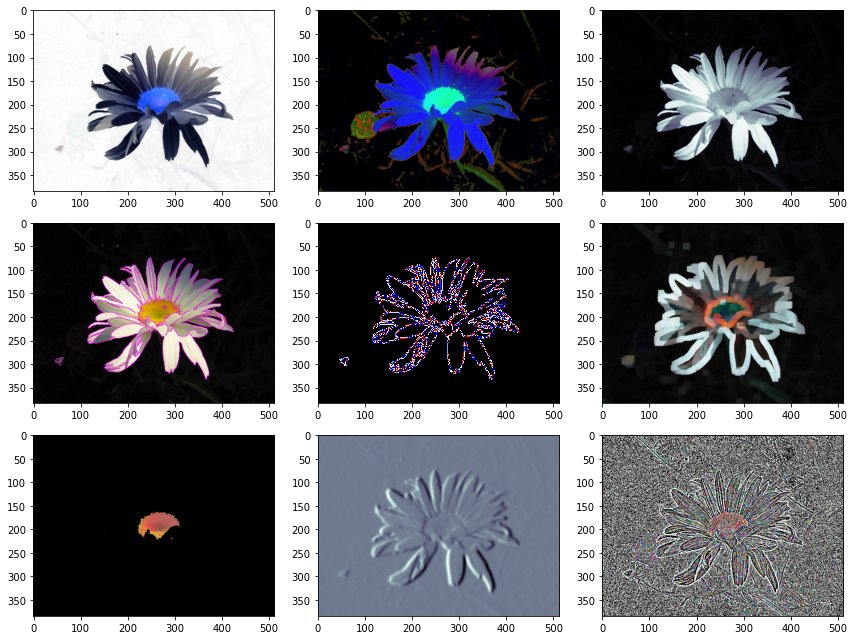

In [7]:
dhtml('opencv playing around',c2,f2,fs2)
file_name2='01_036.png'
get_file(file_path2,file_name2)
img=cv2.imread(file_name2)
img=cv2.resize(img,(512,384))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
edge_img=rgb.copy()
edge=cv2.Canny(gray,80,210)
edge_img[edge!=0]=(255,0,255) 
lower_white=np.array([10,200,10])
upper_white=np.array([255,255,255])
mask=cv2.inRange(hsv,lower_white,upper_white)
res=cv2.bitwise_and(img,img,mask=mask)
kernel=np.ones((11,11),np.uint8)
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
sobel=cv2.Sobel(
    gray,cv2.CV_64F,1,0,ksize=27)
laplacian=cv2.Laplacian(img,cv2.CV_64F)
pl.figure(figsize=(12,9))
pl.subplot(331),pl.imshow(255-rgb)
pl.subplot(332),pl.imshow(hsv)
pl.subplot(333),pl.imshow(gray,cmap='bone')
pl.subplot(334),pl.imshow(edge_img)
pl.subplot(335),pl.imshow(edge,cmap='flag_r')
pl.subplot(336),pl.imshow(gradient)
pl.subplot(337),pl.imshow(
    cv2.cvtColor(res,cv2.COLOR_HSV2RGB))
pl.subplot(338),pl.imshow(sobel,cmap='bone')
pl.subplot(339),pl.imshow(laplacian,cmap='bone')
pl.tight_layout(); pl.show()

40960/35363 [==================================] - 0s 0us/step
('matchstick', 0.07714511)
('nematode', 0.05730191)
('digital_clock', 0.031101355)
('lighter', 0.02672541)
('spotlight', 0.025922133)


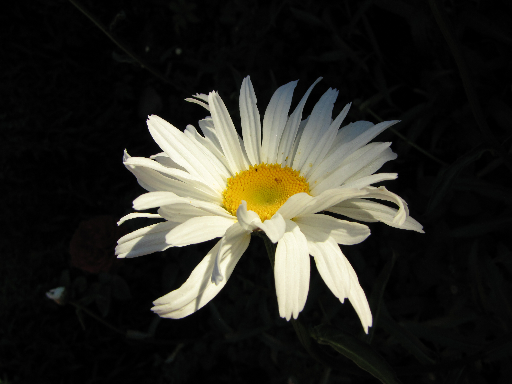

In [8]:
dhtml('keras applications',c2,f2,fs2)
img=load_img(file_path+'03_004.png')
out=tf.keras.applications.vgg19.preprocess_input(img)
out=tf.image.resize(out,(224,224))
vgg19=tf.keras.applications\
.VGG19(include_top=True,weights='imagenet')
prediction_probabilities=vgg19(out)
predicted_top5=tf.keras.applications.vgg19\
.decode_predictions(prediction_probabilities.numpy())[0]
[print((class_name,prob))
 for (number,class_name,prob) in predicted_top5]
dhtml(':)))',c2,f2,fs2)
tensor2img(img)

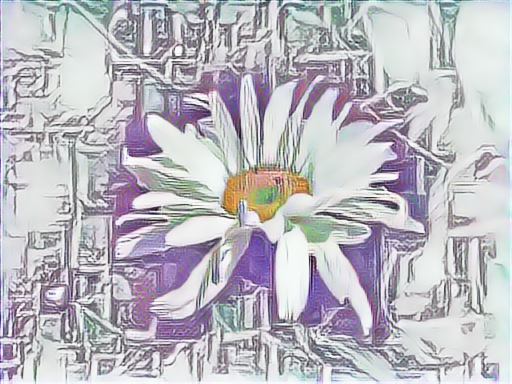

In [9]:
dhtml('tensorflow hub models',c2,f2,fs2)
hub_module=th.load(hub_path)  
content_image=load_img(file_path+'03_004.png')
file_name3='02_018.png'
get_file(file_path2,file_name3)
style_image=load_img(file_name3)
stylized_image=hub_module(
    tf.constant(content_image),tf.constant(style_image))[0]
tensor2img(stylized_image)

In [10]:
dhtml('TensorFlow Data Processing<br/>'+\
      'with Label Selection & Resizing')

In [11]:
num_classes=len(classes)
file_list=sorted(os.listdir(file_path))
x=paths2tensor(file_list,file_path)
y=np.array([int(el[:2]) for el in file_list],
           dtype='int8')-1
cond=np.where([l in classes for l in objects])[0]
cond2=np.where([l in cond for l in y])
x=x[cond2]; y=y[cond2]
rd={0:0,1:1,3:2,4:3,5:4,7:5}
y=np.array([rd.get(el,el) for el in y],dtype='int8')
N=len(y); n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(123).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
x_test,x_valid,x_train=x[:n],x[n:2*n],x[2*n:]
y_test,y_valid,y_train=y[:n],y[n:2*n],y[2*n:]
pd.DataFrame([[x_train.shape,x_valid.shape,x_test.shape],
              [x_train.dtype,x_valid.dtype,x_test.dtype],
              [y_train.shape,y_valid.shape,y_test.shape],
              [y_train.dtype,y_valid.dtype,y_test.dtype]],               
             columns=['train','valid','test'])

100%|██████████| 514/514 [01:32<00:00,  5.56it/s]


,train,valid,test
0,"(324, 160, 160, 3)","(40, 160, 160, 3)","(40, 160, 160, 3)"
1,float32,float32,float32
2,"(324,)","(40,)","(40,)"
3,int8,int8,int8


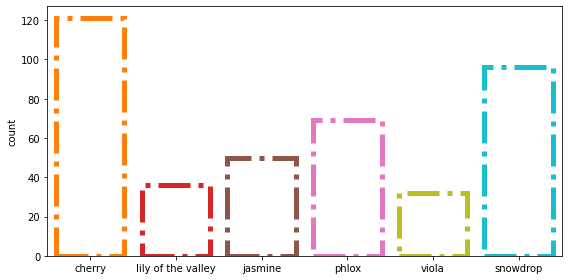

In [12]:
dhtml('label distribution',c2,f2,fs2)
pl.figure(figsize=(8,4))
sn.countplot(
    x=[classes[l] for l in y],facecolor=(0,0,0,0),
    linewidth=5,linestyle='-.',
    edgecolor=plcmap('tab10',num_classes))
pl.tight_layout(); pl.show()

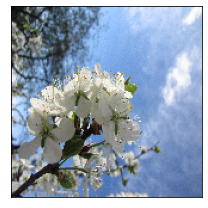

In [13]:
dhtml('label: %s'%classes[y_test[2]],c2,f2,fs2)
pl.figure(figsize=(3,3)); pl.xticks([]); pl.yticks([])
pl.imshow(x_test[2]); pl.tight_layout(); pl.show()

In [14]:
def esrgantf2_superresolution(img,img_size):
    model=th.load('https://tfhub.dev/captain-pool/esrgan-tf2/1')
    func=model.signatures[tf.saved_model\
                          .DEFAULT_SERVING_SIGNATURE_DEF_KEY]
    func.inputs[0].set_shape([1,img_size,img_size,3])
    converter=tf.lite.TFLiteConverter.from_concrete_functions([func])
    converter.optimizations=[tf.lite.Optimize.DEFAULT]
    tflite_model=converter.convert()
    with tf.io.gfile.GFile('ESRGAN.tflite','wb') as f:
        f.write(tflite_model)
    esrgan_model_path='./ESRGAN.tflite'
    if img.mean()<1.: img=img*255.
    lr=tf.image.resize(img,[img_size,img_size])
    lr=tf.expand_dims(lr.numpy()[:,:,:3],axis=0)
    lr=tf.cast(lr,tf.float32)
    interpreter=tf.lite.Interpreter(model_path=esrgan_model_path)
    interpreter.allocate_tensors()
    input_details=interpreter.get_input_details()
    output_details=interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'],lr)
    interpreter.invoke()
    output_data=interpreter.get_tensor(output_details[0]['index'])
    sr=tf.squeeze(output_data,axis=0)
    sr=tf.clip_by_value(sr,0,255)
    sr=tf.round(sr); sr=tf.cast(sr,tf.uint8)
    lr=tf.cast(tf.squeeze(lr,axis=0),tf.uint8)
    return lr,sr
lr,sr=esrgantf2_superresolution(x[100],img_size2)

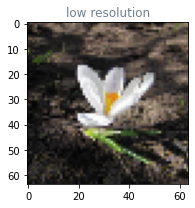

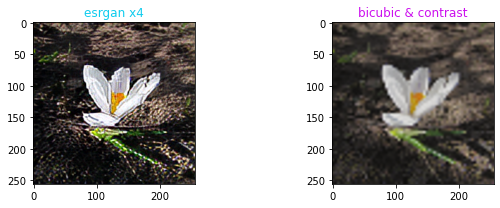

In [15]:
dhtml('super resolution',c2,f2,fs2)
def low2superbicubic_imgs(lr,sr):
    pl.figure(figsize=(9,3))
    pl.title(f'low resolution',color='slategray')
    pl.imshow(lr.numpy()); pl.tight_layout(); pl.show()
    pl.figure(figsize=(9,3)); pl.subplot(1,2,1)
    pl.title(f'esrgan x4',color=c1)
    pl.imshow(sr.numpy())
    img_size=lr.shape[1]
    bicubic=tf.image.resize(
        lr,[img_size*4,img_size*4],tf.image.ResizeMethod.BICUBIC)
    bicubic_contrast=tf.image.adjust_contrast(bicubic,.8)
    bicubic_contrast=tf.cast(bicubic_contrast,tf.uint8)
    pl.subplot(1,2,2); pl.title(f'bicubic & contrast',color=c2)
    pl.imshow(bicubic_contrast.numpy())
    pl.tight_layout(); pl.show()
low2superbicubic_imgs(lr,sr)

In [16]:
dhtml('hierarchical data formatting',c2,f2,fs2)
with h5py.File('WhiteFlowerImages.h5','w') as f:
    f.create_dataset('train_images',data=x_train)
    f.create_dataset('train_labels',data=y_train)
    f.create_dataset('valid_images',data=x_valid)
    f.create_dataset('valid_labels',data=y_valid)
    f.create_dataset('test_images',data=x_test)
    f.create_dataset('test_labels',data=y_test)
st=['st_mode','st_ino','st_dev','st_nlink','st_uid',
    'st_gid','st_size','st_atime','st_mtime','st_ctime']
pd.DataFrame(os.stat('WhiteFlowerImages.h5'),
             index=st,columns=['os.stat results'])

,os.stat results
st_mode,33188
st_ino,131087
st_dev,1793
st_nlink,1
st_uid,0
st_gid,0
st_size,124113300
st_atime,1612631793
st_mtime,1612631793
st_ctime,1612631793


In [17]:
dhtml('PyTorch Data Processing<br/>'+\
      'with Label Selection,Cropping, & Resizing')

In [18]:
dhtml('pytorch data classes',c2,f2,fs2)
class TData(tds):
    def __init__(self,x,y):   
        self.x=torch.tensor(x,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.int32)
    def __getitem__(self,index):
        img,lbl=self.x[index],self.y[index]
        return img,lbl
    def __len__(self):
        return self.y.shape[0]

In [19]:
shuffle_ids=np.arange(N)
np.random.RandomState(123).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
t1=tf.random.uniform(shape=(N,2),minval=0,maxval=.1)
t2=tf.random.uniform(shape=(N,2),minval=.9,maxval=1)
boxes=tf.concat([t1,t2],1)
box_indices=list(range(N))
x=tf.image.crop_and_resize(x,boxes,box_indices,crop_size)
x=np.transpose(x.numpy(),(0,3,1,2))
print(x.mean(),x.std())
x_test,x_valid,x_train=x[:n],x[n:2*n],x[2*n:]
y_test,y_valid,y_train=y[:n],y[n:2*n],y[2*n:]
random_seed=23
train=TData(x_train,y_train)
valid=TData(x_valid,y_valid)
test=TData(x_test,y_test)
dataloaders={'train':tdl(dataset=train,shuffle=True, 
                         batch_size=batch_size2), 
             'valid':tdl(dataset=valid,shuffle=True, 
                         batch_size=batch_size2),
             'test':tdl(dataset=test,shuffle=True, 
                        batch_size=batch_size2)}

0.36955148 0.2726463


image dimensions: torch.Size([8, 3, 64, 64])
label dimensions: torch.Size([8])


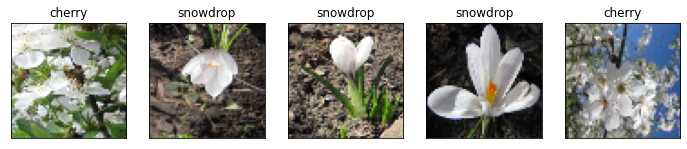

In [20]:
%display_examples valid